# Lab -09


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('dataset.csv')

data

,X1,X2,Y
0,7,7,Bad
1,7,4,Bad
2,3,4,Good
3,1,4,Good
4,4,5,Bad
5,3,5,Good
6,4,6,Bad
7,8,7,Bad
8,7,9,Good
9,8,8,Bad


## Q1


1. We have data from the questionnaires survey (to ask people opinion) and objective testing with two attributes (acid durability and strength) to classify whether a special paper tissue is good or not. Here is four training samples as follows. Apply the K-nearest neighbour’s (KNN) algorithm when K=2, 3 and 4 to classify an instance (3, 7) as good or bad.
    
    Implement the above using python without using scikit learn library. Plot the given samples Bad in Red color and Good in green color. Also draw the decision boundary. Calculate the distance using Euclidean, Manhattan, and  Minkowski and compare.   
    

K: 2, Distance: Euclidean => Classification: Cannot be classified
K: 2, Distance: Manhattan => Classification: Cannot be classified
K: 2, Distance: Minkowski => Classification: Cannot be classified

K: 3, Distance: Euclidean => Classification: Bad
K: 3, Distance: Manhattan => Classification: Good
K: 3, Distance: Minkowski => Classification: Bad

K: 4, Distance: Euclidean => Classification: Cannot be classified
K: 4, Distance: Manhattan => Classification: Cannot be classified
K: 4, Distance: Minkowski => Classification: Cannot be classified



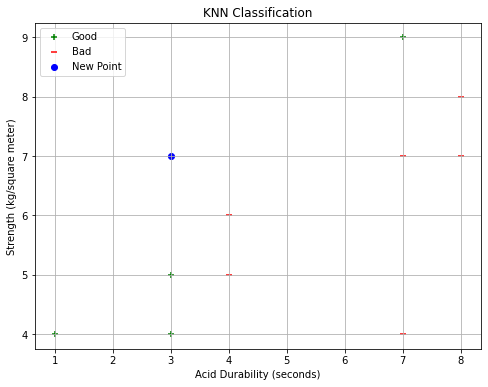

In [28]:
# Instance to classify
new_point = np.array([3, 7])

#features and target variable
X = data[['X1 ', 'X2']].values
Y = data['Y'].apply(lambda y: 1 if y == 'Good' else 0).values

#distance metrics

# Euclidean distance function
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Manhattan distance function
def manhattan(a, b):
    return np.sum(np.abs(a - b))

# Minkowski distance function with a default power of 3
def minkowski(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

# KNN classification function
def knn(k, dist_func):
    distances = [dist_func(x, new_point) for x in X]
    sorted_indices = np.argsort(distances)
    top_k_indices = sorted_indices[:k]
    
    good_count = sum(1 for index in top_k_indices if Y[index] == 1)
    bad_count = k - good_count

    return "Good" if good_count > bad_count else ("Bad" if good_count < bad_count else "Cannot be classified")

# List of K values to test
k_values = [2, 3, 4]

# Looping through different K values and distance metrics
for k in k_values:
    for dist_func, name in zip([euclidean, manhattan, minkowski], ["Euclidean", "Manhattan", "Minkowski"]):
        result = knn(k, dist_func)
        print(f"K: {k}, Distance: {name} => Classification: {result}")
    print()

#indices of 'Good' and 'Bad' points
good_indices = np.where(Y == 1)
bad_indices = np.where(Y == 0)

#scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[good_indices, 0], X[good_indices, 1], c='green', marker='+', label='Good')
plt.scatter(X[bad_indices, 0], X[bad_indices, 1], c='red', marker='_', label='Bad')
plt.scatter(new_point[0], new_point[1], c='blue', marker='o', label='New Point')

plt.xlabel('Acid Durability (seconds)') 
plt.ylabel('Strength (kg/square meter)')
plt.title('KNN Classification')
plt.grid(True)
plt.legend()
plt.show()


## Q2

2. Implement the Question number 1 with using scikit learn library. Plot the given samples Bad in Red color and Good in green color. Also plot the decision boundary. Calculate the distance using Euclidean, Manhattan, and  Minkowski and compare.   

K: 2, Distance: Euclidean, Classification: Bad
K: 2, Distance: Manhattan, Classification: Bad
K: 2, Distance: Minkowski, Classification: Bad

K: 3, Distance: Euclidean, Classification: Bad
K: 3, Distance: Manhattan, Classification: Good
K: 3, Distance: Minkowski, Classification: Bad

K: 4, Distance: Euclidean, Classification: Bad
K: 4, Distance: Manhattan, Classification: Bad
K: 4, Distance: Minkowski, Classification: Bad



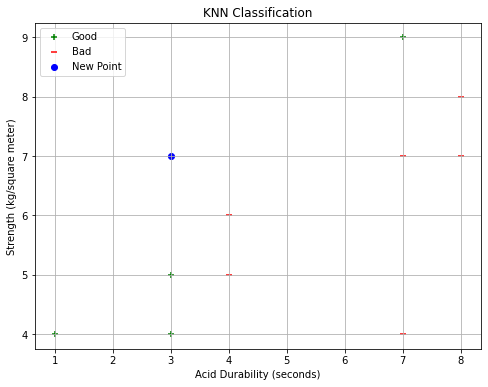

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset from a CSV file
data = pd.read_csv('dataset.csv')

#features and target variable
X = data[['X1 ', 'X2']].values
Y = data['Y'].apply(lambda y: 1 if y == 'Good' else 0).values

# Specify the new point to classify
new_point = np.array([[3, 7]])

# List of K values to test
k_values = [2, 3, 4]

# Looping through different K values and distance metrics
for k in k_values:
    for metric in ['euclidean', 'manhattan', 'minkowski']:
        #K-Nearest Neighbors classifier with the specified K and distance metric
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # Fitting the model with the data
        knn.fit(X, Y)
        
        prediction = knn.predict(new_point)
        
        print(f"K: {k}, Distance: {metric.capitalize()}, Classification: {'Good' if prediction == 1 else 'Bad'}")
    print()

# Creating a scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='green', marker='+', label='Good')
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c='red', marker='_', label='Bad')
plt.scatter(new_point[0, 0], new_point[0, 1], c='blue', marker='o', label='New Point')
plt.xlabel('Acid Durability (seconds)')
plt.ylabel('Strength (kg/square meter)')
plt.title('KNN Classification')
plt.grid(True)
plt.legend()
plt.show()
